# 📉 Entrenamiento del Modelo: Regresión Lineal

Este notebook tiene como objetivo entrenar un modelo de Regresión Lineal para la predicción de precios de propiedades en Argentina, utilizando las variables limpias del dataset `properati_clean.csv`.

In [1]:
!git clone https://github.com/joseigmartinez/proyecto-properati-unicaba2025

Cloning into 'proyecto-properati-unicaba2025'...
remote: Enumerating objects: 13, done.
remote: Counting objects: 100% (13/13), done.
remote: Compressing objects: 100% (11/11), done.
remote: Total 13 (delta 2), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (13/13), 993.53 KiB | 4.21 MiB/s, done.
Resolving deltas: 100% (2/2), done.


In [2]:
!ls

proyecto-properati-unicaba2025	sample_data


In [3]:
%cd proyecto-properati-unicaba2025

/content/proyecto-properati-unicaba2025


In [4]:
!ls

preprocesamiento.ipynb	properati_clean.csv  README.md


In [5]:
### Importación de Librerías
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import os

In [ ]:
#####################################################################
## FUNCIÓN PARA GUARDAR MÉTRICAS
#####################################################################
def guardar_metricas(modelo_nombre, rmse, mae, r2, filename='metricas_entrenamiento_lineal.csv'):
    """Crea o añade una fila al CSV de métricas."""

    # Creamos un DataFrame con las métricas de la ejecución actual
    metricas = pd.DataFrame({
        'modelo': [modelo_nombre],
        'fecha_ejecucion': [pd.Timestamp.now()],
        'RMSE': [rmse],
        'MAE': [mae],
        'R2': [r2]
    })

    # Modo de guardado: 'a' (append) para añadir, 'w' (write) para crear/sobrescribir
    if not os.path.exists(filename):
        # Si no existe, lo crea con encabezados
        metricas.to_csv(filename, index=False, header=True)
        print(f"  > Archivo de métricas creado en '{filename}'.")
    else:
        # Si existe, añade la nueva fila sin encabezados
        metricas.to_csv(filename, mode='a', index=False, header=False)
        print(f"  > Métricas añadidas a '{filename}'.")

In [6]:
#####################################################################
## 1. Carga de Datos y Preparación
#####################################################################
#Cargamos el dataset limpio y definimos las variables predictoras (X) y la variable objetivo (Y).

# Definimos las columnas a utilizar:
TARGET = 'price'
FEATURES = ['surface_total', 'rooms', 'bathrooms']

# Carga del dataset limpio
try:
    # Se asume que properati_clean.csv está en el mismo directorio
    df = pd.read_csv('properati_clean.csv')
    print(f"Dataset cargado correctamente. Filas: {len(df)}")
except FileNotFoundError:
    print("ERROR: Asegúrate de que 'properati_clean.csv' esté en el mismo directorio.")
    exit()

# 1. Separación de X e Y
X = df[FEATURES]
y = df[TARGET]

# 2. División en conjuntos de entrenamiento y prueba (80% / 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"\nConjunto de entrenamiento (X_train): {X_train.shape}")
print(f"Conjunto de prueba (X_test): {X_test.shape}")

Dataset cargado correctamente. Filas: 102158

Conjunto de entrenamiento (X_train): (81726, 3)
Conjunto de prueba (X_test): (20432, 3)


In [7]:
#####################################################################
## 2. Entrenamiento del Modelo de Regresión Lineal
#####################################################################
#La Regresión Lineal asume una relación lineal entre la variable de entrada (X) y la variable de salida (Y).

# Inicialización y entrenamiento del modelo
modelo_lineal = LinearRegression()
modelo_lineal.fit(X_train, y_train)

# Predicciones sobre el conjunto de prueba
y_pred_lineal = modelo_lineal.predict(X_test)

print("✅ Modelo de Regresión Lineal entrenado.")

✅ Modelo de Regresión Lineal entrenado.


In [8]:
###Evaluación y Métricas
#####################################################################
## 3. Evaluación del Modelo: Métricas de Regresión
#####################################################################
#Evaluamos el rendimiento del modelo utilizando tres métricas clave: RMSE, MAE y R².

### Explicación RMSE - Error Cuadrático Medio de la Raíz (RMSE)
# Es la raíz cuadrada del promedio de los errores al cuadrado. Está en las mismas unidades que la variable objetivo (USD).
# Penaliza fuertemente los errores grandes. Un valor menor indica un mejor ajuste. Un RMSE de 50.000 USD, por ejemplo, significa que el error promedio del modelo es de $50,000 USD, dando más peso a los errores grandes.

### Explicación MAE - Error Absoluto Medio (MAE)
# Es el promedio de la magnitud de los errores absolutos. Es más fácil de interpretar que el RMSE.
# Representa el error promedio absoluto. Un MAE de 30.000 USD significa que, en promedio, el modelo se equivoca en $30,000 USD al predecir el precio. Un valor menor es mejor.

### Explicación R² - Coeficiente de Determinación (R² o R-cuadrado)
# Mide la proporción de la varianza en la variable dependiente ($Y$) que es explicada por las variables independientes (X). Su valor varía de 0 a 1.
# Un valor de 0.75 (o 75%) indica que el 75% de la variación en los precios de las propiedades puede ser explicado por las características utilizadas. Un valor mayor es mejor.

### Cálculo de Métricas
rmse = np.sqrt(mean_squared_error(y_test, y_pred_lineal))
mae = mean_absolute_error(y_test, y_pred_lineal)
r2 = r2_score(y_test, y_pred_lineal)

# Impresión de resultados
print("\n--- Métricas del Modelo de Regresión Lineal ---")
print(f"RMSE (Raíz del Error Cuadrático Medio): {rmse:,.2f} USD")
print(f"MAE (Error Absoluto Medio): {mae:,.2f} USD")
print(f"R² (Coeficiente de Determinación): {r2:.4f}")
print("--------------------------------------------------")


--- Métricas del Modelo de Regresión Lineal ---
RMSE (Raíz del Error Cuadrático Medio): 126,252.02 USD
MAE (Error Absoluto Medio): 86,881.63 USD
R² (Coeficiente de Determinación): 0.2607
--------------------------------------------------


In [ ]:
#####################################################################
## Guardar las métricas
#####################################################################
guardar_metricas(
    modelo_nombre='Regresion_Lineal',
    rmse=rmse,
    mae=mae,
    r2=r2
)

In [9]:
#####################################################################
## 4. Guardado de Resultados para BBDD
#####################################################################
#Guardamos los precios reales y las predicciones del modelo en un archivo CSV para su posterior carga en una base de datos.

### Guardar CSV
# Creamos un DataFrame con los resultados
resultados = pd.DataFrame({
    'id_registro': X_test.index,
    #Usamos el índice para identificar el registro original
    'precio_real': y_test,
    'prediccion_lineal': y_pred_lineal
})

# Guardar el DataFrame como .csv
output_filename = 'resultados_lineal.csv'
resultados.to_csv(output_filename, index=False)

print(f"✅ Resultados de la Regresión Lineal guardados en '{output_filename}'")

✅ Resultados de la Regresión Lineal guardados en 'resultados_lineal.csv'


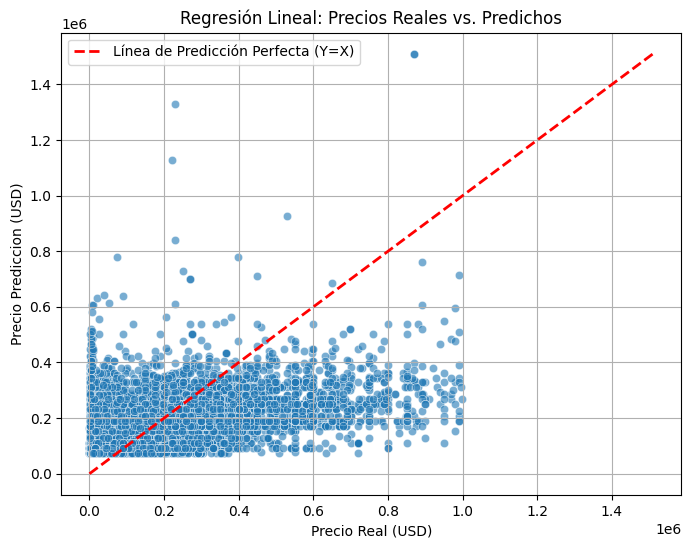

In [12]:
#####################################################################
## 5. Visualización del Rendimiento
#####################################################################
#Para entender visualmente el rendimiento del modelo, graficamos los precios reales (price_real) contra los precios predichos (prediccion_lineal) en el conjunto de prueba.

### Generación del Gráfico Real vs Prediccion
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
# Gráfico de dispersión de Precios Reales vs. Prediccion
sns.scatterplot(x=resultados['precio_real'], y=resultados['prediccion_lineal'], alpha=0.6)

# Línea de referencia (donde Predicción = Real)
max_val = resultados[['precio_real', 'prediccion_lineal']].max().max()
plt.plot([0, max_val], [0, max_val], color='red', linestyle='--', linewidth=2, label='Línea de Predicción Perfecta (Y=X)')

plt.title('Regresión Lineal: Precios Reales vs. Predichos')
plt.xlabel('Precio Real (USD)')
plt.ylabel('Precio Prediccion (USD)')
plt.legend()
plt.grid(True)
plt.show()

### Interpretación del Gráfico de Dispersión
#Línea Roja (Y=X): Esta línea representa la predicción perfecta, donde la predicción del modelo es exactamente igual al precio real.
# Puntos Azules: Cada punto es una propiedad en el conjunto de prueba.
# Explicacion -> Cuanto más cerca estén los puntos azules de la línea roja, mejor será el rendimiento del modelo.
#Los puntos que se alejan de la línea roja (por ejemplo, los puntos por encima o por debajo) indican errores de predicción significativos
#sugiren que el modelo está subestimando o sobreestimando el precio de esa propiedad.